<h1>Gráficas covidatos</h1>

Plenamente en este notebook se encuentran algunas gráficas que modelan los datos descargados desde una página de datos abiertos en el gobierno:<br> <a href="https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr/data">el hipervínculo aquí</a> <br>

Básicamente, en este notebook se contienen cuatro gráficas: <br>

<ol>
    <li>Gráfica de torta que modela el número de contagios con respecto al sexo en el país</li>
    <li>Gráfica de barras conjunta que modela los primeros diez departamentos con mayor número de contagios</li>
    <li>Gráfica de barras de contagios con respecto a un rango de edades separados en 20 años</li>
    <li>Gráfica del número total de recuperados, activos y fallecidos</li>
</ol>
<br>

Los datos mostrados están actualizados a la fecha del 30 de septiembre del 2020

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from main import tomarConexión
conexion=tomarConexión()

Connected to MySQL Server version  8.0.19
You're connected to database:  ('datoscovid',)


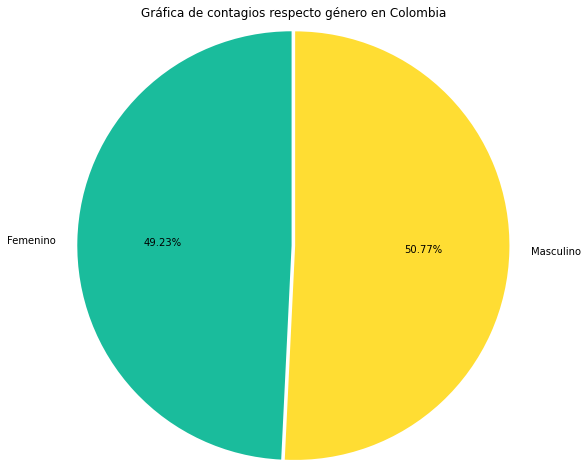

In [2]:
paleta=['#1abc9c','#ffdd33']
cursor=conexion.cursor()
#grafica N1 genero colombia
cursor.execute('select sexo,count(*) as cantidad from datos group by sexo;')
cantidad=[]
for fila in cursor:
    cantidad.append(fila[1])
sexo=['Femenino','Masculino']
colores=[paleta[0],paleta[1]]
plt.figure(figsize=(8,10))
plt.title("Gráfica de contagios respecto género en Colombia")
plt.pie(cantidad, labels=sexo, colors=colores, startangle=90, explode=(0.01,0.01), radius=1.2, autopct='%1.2f%%' )
#plt.show()
plt.savefig('Circular.png')

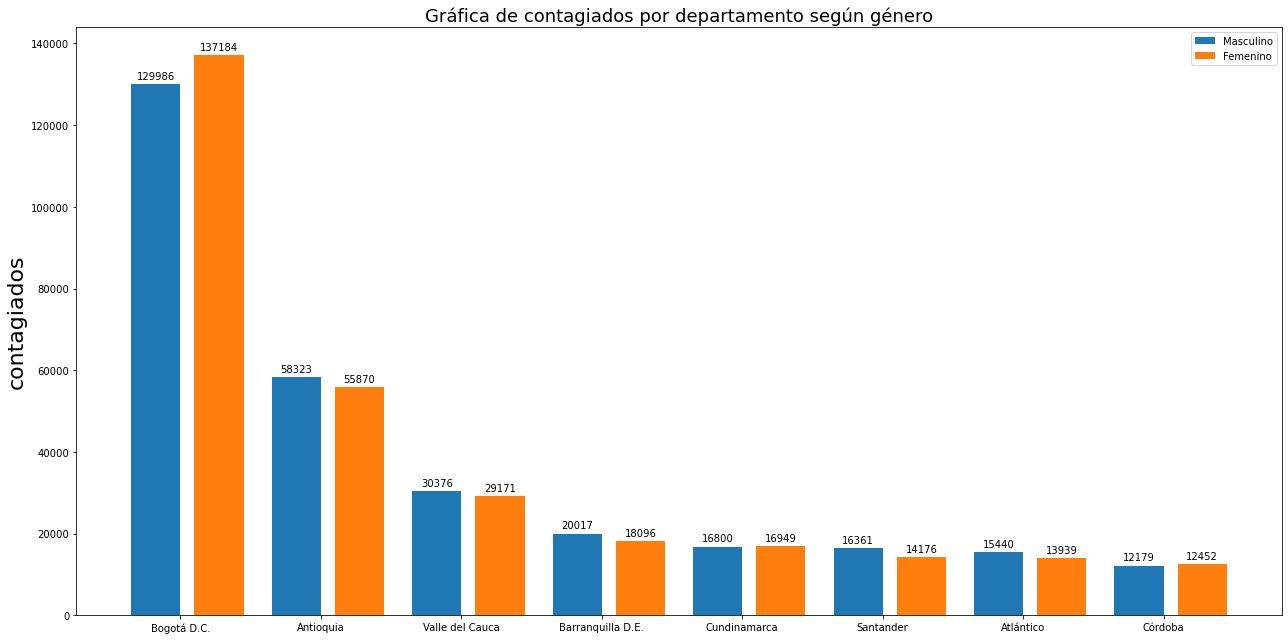

In [3]:
cursor.execute('select departamento, count(*) as contagios from datos group by departamento order by contagios desc, departamento limit 8;')
departamentos=[]
for fila in cursor:
    departamentos.append(fila[0])
cursor.execute('select departamento, sexo, count(*) as contagios from datos group by sexo, departamento order by contagios desc, departamento limit 16;')
masculino=[]
femenino=[]
for fila in cursor:
    if fila[1]=='M':
        masculino.append(fila[2])
    else:
        femenino.append(fila[2])
x=np.arange(len(departamentos))
#tamaño barra
width=0.35
#barra hombre
fig, ax = plt.subplots(figsize=(18,9))
rectaMasc=ax.bar(x-width/2,masculino,width,label='Masculino')
#barra femenino
rectafem=ax.bar(x+width/2+0.1,femenino,width,label='Femenino')
#etiquetas
ax.set_ylabel('contagiados',fontsize=22)
ax.set_title('Gráfica de contagiados por departamento según género',fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(departamentos)
#leyenda
ax.legend()
#funcion para agregar etiqueta a cada barra
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
#etiqueta a cada barra
autolabel(rectaMasc)
autolabel(rectafem)
fig.tight_layout()

plt.savefig('doble_barra.png')


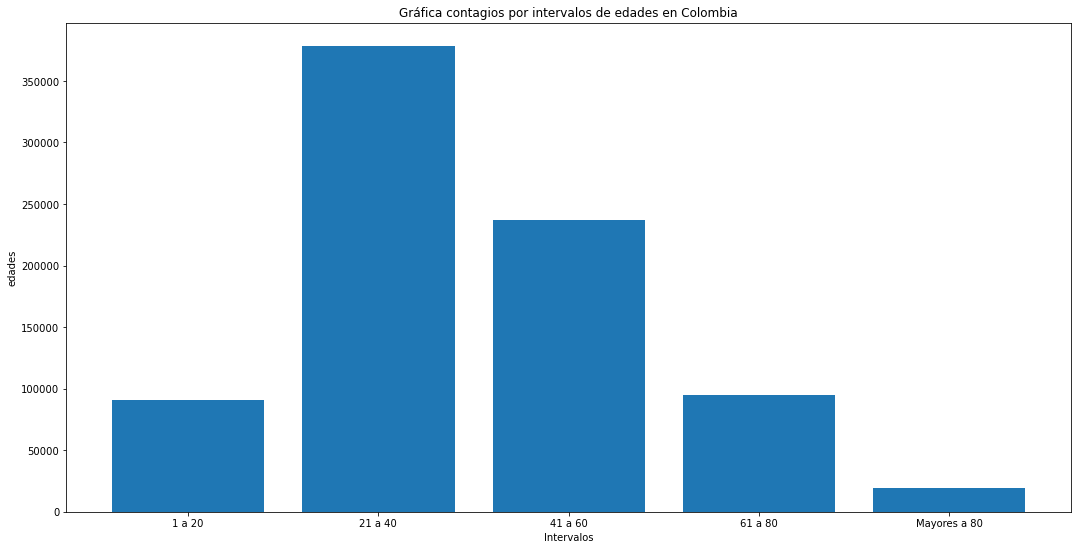

In [4]:
cursor = conexion.cursor(buffered=True)
cursor.execute('select edad, count(*) as contagiados from datos group by edad;')
edades=['1 a 20','21 a 40','41 a 60','61 a 80','Mayores a 80']

valores=[]

cursor.execute('select count(*) as contagiados from datos where edad between 1 and 20;')
for fila in cursor:
    valores.append(fila[0])

cursor.execute('select count(*) as contagiados from datos where edad between 21 and 40;')
for fila in cursor:
    valores.append(fila[0])

cursor.execute('select count(*) as contagiados from datos where edad between 41 and 60;')
for fila in cursor:
    valores.append(fila[0])

cursor.execute('select count(*) as contagiados from datos where edad between 61 and 80;')
for fila in cursor:
    valores.append(fila[0])   

cursor.execute('select count(*) as contagiados from datos where edad > 80;')
for fila in cursor:
    valores.append(fila[0])
#plt.figure(figsize=(10,6))
fig, ax=plt.subplots(figsize=(18,9))
#Etiqueta en el eje y
ax.set_ylabel('edades')
#Etiqueta en el eje x
ax.set_xlabel('Intervalos')
#Titulo
ax.set_title('Gráfica contagios por intervalos de edades en Colombia')

plt.bar(edades, valores)

#plt.show()
plt.savefig('barras_edad.png')

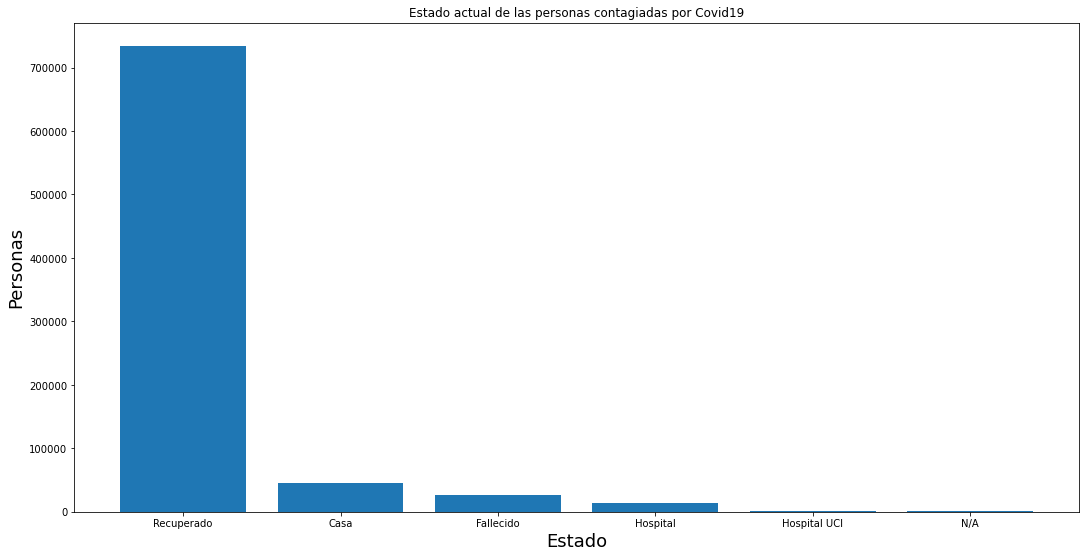

In [5]:
cursor=conexion.cursor()
cursor.execute('select atencion, count(*) as personas from datos group by atencion order by personas desc;')
atencion=[]
cantidad=[]
for fila in cursor:
    atencion.append(fila[0])
    cantidad.append(fila[1])

fig, ax = plt.subplots(figsize=(18,9))
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Personas',fontsize=18)
#Colocamos una etiqueta en el eje X
ax.set_xlabel('Estado',fontsize=18)
#Título
ax.set_title('Estado actual de las personas contagiadas por Covid19')
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
plt.bar(atencion, cantidad)
#Finalmente mostramos la grafica con el metodo show()
#plt.show()
plt.savefig('barras_estado.png')
conexion.close()